In [70]:
#Determine whether or not a correlation exists between the number of dependents and three additional
#attributes referring to returns: number of single returns, number of joint returns, and total number
#of returns.

#Identify zip codes of densely populated areas (cities, towns, etc.) vs. sparsely populated areas (rural, suburban, etc).

#Discover whether certain zip code produce higher adjusted gross income and 
#whether a community’s density implies its income and vice versa.


In [233]:
import pandas as pd
import numpy as np
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans
import scipy.cluster.vq as vq
from scipy.cluster.vq import kmeans, kmeans2, vq
import pylab
from collections import defaultdict
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
import statsmodels.api as sm

In [72]:
df = pd.read_csv('zcta2010.csv')
df = df.iloc[131:668]
df = df.drop(['Unnamed: 9'], axis=1)
df = df.drop(['Unnamed: 10'], axis=1)
df

,ZCTA5,LANDSQMT,WATERSQMT,LANDSQMI,WATERSQMI,POPULATION,HSGUNITS,INTPTLAT,INTPTLON
131,1001,29635470,2229770,11.44,0.86,"16,769","7,557",42.062332,-72.628274
132,1002,142556362,4280260,55.04,1.65,"29,049","10,388",42.363977,-72.458507
133,1003,1842384,12788,0.71,0.00,"10,372",5,42.389941,-72.524108
134,1005,114586903,667042,44.24,0.26,"5,079","2,044",42.418848,-72.106598
135,1007,136345999,6943853,52.64,2.68,"14,649","5,839",42.279010,-72.400468
136,1008,139331467,5086093,53.80,1.96,"1,263",586,42.191846,-72.957325
137,1009,2065002,23,0.80,0.00,741,341,42.211969,-72.341433
138,1010,89982811,1420260,34.74,0.55,"3,609","1,598",42.129477,-72.205302
139,1011,81884563,342573,31.62,0.13,"1,370",659,42.300281,-72.968716
140,1012,33977749,545075,13.12,0.21,661,343,42.375425,-72.858192


In [73]:
df2 = pd.read_csv("MAZip.csv")

/Users/Aditi/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
a = 112
for i in range(144):
    num = a + i
    string = 'Unnamed: ' + str(num)
    df2 = df2.drop([string], axis=1)


In [128]:
df2.head(20)

,ZIP code [1],Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Adjusted gross income (AGI) [2],...,Total tax liability [8],Unnamed: 103,Additional Medicare tax,Unnamed: 105,Net investment income tax,Unnamed: 107,Tax due at time of filing [9],Unnamed: 109,Overpayments refunded [10],Unnamed: 111
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount
1,NaN,NaN,(1),(2),(3),(4),(5),(6),(7),(8),...,(101),(102),(103),(104),(105),(106),(107),(108),(109),(110)
2,0,Total,"3,259,630","1,690,620","1,154,240","355,030","1,826,740","5,900,190","1,751,030","264,767,811",...,"2,567,620","43,259,453","110,980","236,187","113,870","620,136","635,820","3,778,896","2,449,670","7,565,186"
3,0,"$1 under $25,000",1096490,831380,104100,144230,565440,1269740,327500,12763385,...,507910,441981,0,0,0,0,109890,94893,894480,1477121
4,0,"$25,000 under $50,000",719780,441660,138810,119450,384380,1174650,321640,26328263,...,633770,1859808,0,0,0,0,101530,171376,604710,1411219
5,0,"$50,000 under $75,000",457460,229730,165200,50370,261740,846600,224450,28167244,...,444990,2769114,0,0,0,0,94210,207775,352370,974332
6,0,"$75,000 under $100,000",299550,92670,181630,20050,179410,675520,194450,25975523,...,296690,2802638,20,3,0,0,70580,198750,219940,760167
7,0,"$100,000 under $200,000",486510,75260,389960,16850,293680,1325050,448730,66675465,...,484560,9053502,3550,801,1020,299,157450,698471,309230,1374759
8,0,"$200,000 or more",199840,19920,174540,4080,142090,608630,234260,104857931,...,199700,26332410,107410,235383,112850,619837,102160,2407631,68940,1567588
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
arr = []

for i in df2.index: 
    mod = (i - 10)%8
    if mod == 0:
        arr.append(df2.iloc[i])

In [202]:
d = defaultdict(list)
for i in range(3858): 
    mod = (i - 10)%8
    if mod == 0:
        zip1 = int(df2.iloc[i][0])
        d[zip1] = {}
        d[zip1]["dependents"] = locale.atoi(df2.iloc[i][8])    #number of dependents
        d[zip1]["returns"] = locale.atoi(df2.iloc[i][2])       #number of returns
        d[zip1]["joint"] = locale.atoi(df2.iloc[i][3])         #number of joint returns
        d[zip1]["single"] = locale.atoi(df2.iloc[i][4])        #number of single return
        d[zip1]["income"] = locale.atoi(df2.iloc[i][11])       #total income

In [203]:
d

defaultdict(list,
            {0: {'dependents': 1751030,
              'income': 268804243,
              'joint': 1690620,
              'returns': 3259630,
              'single': 1154240},
             1001: {'dependents': 4000,
              'income': 477601,
              'joint': 4750,
              'returns': 8780,
              'single': 3030},
             1002: {'dependents': 4440,
              'income': 762298,
              'joint': 5140,
              'returns': 9570,
              'single': 3530},
             1005: {'dependents': 1240,
              'income': 129645,
              'joint': 1050,
              'returns': 2230,
              'single': 980},
             1007: {'dependents': 4210,
              'income': 489020,
              'joint': 3350,
              'returns': 7300,
              'single': 3280},
             1008: {'dependents': 290,
              'income': 38867,
              'joint': 280,
              'returns': 640,
              'single': 320}

In [137]:
arr[1]

ZIP\rcode [1]                                                  1001
Size of adjusted gross income                                   NaN
Number of returns                                             8,780
Number of single returns                                      4,750
Number of joint returns                                       3,030
Number of head of household returns                             870
Number with paid preparer's signature                         4,970
Number of exemptions                                         15,140
Number of dependents                                          4,000
Adjusted gross income (AGI) [2]                             471,936
Total income                                                  8,780
Unnamed: 11                                                 477,601
Salaries and wages in AGI                                     7,310
Unnamed: 13                                                 358,943
Taxable interest                                

In [78]:
df.iloc[0]['ZCTA5']

1001

In [227]:
#Create array of values to cluster
x = []
y = []
clusters = []
for i in range(537):
    x1 = df.iloc[i]['INTPTLON']
    y1 = df.iloc[i]['INTPTLAT']
    #y1 = locale.atoi(y1)
    if x1 == 0:
        continue
    else:
        #x1 = 100000/float(x1)     #Since we are looking for urban places, plotting population inversely against 
        x.append(x1)              #land area will allow us to plot a graph according to density
        y.append(y1)
        clusters.append([x1, y1])

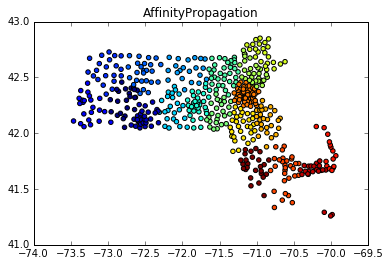

In [228]:
#AffinityPropagation
y_pred = sklearn.cluster.AffinityPropagation().fit_predict(clusters)

plt.scatter(x, y, c=y_pred)
plt.title("AffinityPropagation")

#plt.xlim([-71,-69])

In [ ]:
df["CLUSTER"] = y_pred    

In [124]:
arr2 = [None]*19

for i in range(537):
    num = df.iloc[i]["CLUSTER"]
    zipC = df.iloc[i]["ZCTA5"]
    if arr2[num] == None:
        arr2[num] = [zipC]
    else:
        arr2[num].append(zipC)


In [220]:
#for each cluster of zip codes
#find the number of dependents per person per group
totals = []
avrgs = []
for i in range(19):
    length = len(arr2[i])
    dependents = 0
    returns = 0
    joint = 0
    single = 0
    income = 0
    for j in range(length):    #within each cluster group, for each zip code
        zip1 = int(arr2[i][j])
        if d[zip1] != []:
            dependents += d[zip1]["dependents"]
            returns += d[zip1]["returns"]
            joint += d[zip1]["joint"]
            single += d[zip1]["single"]
            income += d[zip1]["income"]
    totals2 = [returns, dependents, joint, single, income]
    avrgs2 = [returns/float(length), dependents/float(length), joint/float(length), single/float(length), income/float(length)]
    totals.append(totals2)
    avrgs.append(avrgs2)

In [221]:
totals

[[73890, 36760, 38510, 25850, 4307696],
 [177540, 106160, 88020, 58210, 9747323],
 [39190, 17510, 20560, 13680, 2285407],
 [26180, 11990, 13090, 10110, 1419438],
 [43830, 19590, 22920, 16410, 2618904],
 [95250, 54690, 45680, 36590, 5552869],
 [54230, 29920, 25720, 21400, 3146453],
 [185990, 109530, 92560, 65640, 12107492],
 [218140, 137090, 103270, 90650, 23018563],
 [186360, 113230, 88160, 80020, 17161086],
 [419230, 239100, 213170, 147970, 30190145],
 [133750, 69910, 67220, 53030, 11856702],
 [265190, 160600, 129170, 102900, 22113560],
 [208990, 121660, 103310, 84120, 17830127],
 [757490, 349450, 447530, 214290, 81815578],
 [102260, 47210, 51360, 40630, 7304581],
 [23180, 7060, 12570, 8660, 1592080],
 [50810, 19150, 27320, 17720, 3275141],
 [155860, 84730, 77490, 54080, 8216032]]

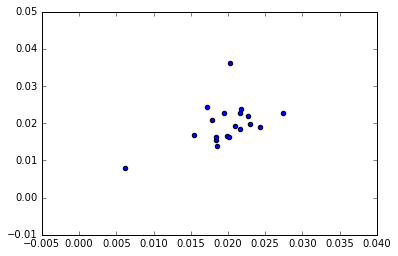

In [229]:
#total dependents per return vs total joint returns per return
x = []
y = []
for i in range(19):
    divide = totals[i][0]
    x1 = avrgs[i][1]
    x1 = x1/float(divide)
    y1 = avrgs[i][2]
    y1 = y1/float(divide)
    x.append(x1)
    y.append(y1)

plt.scatter(x,y)

In [235]:
r = sm.OLS(y,sm.add_constant(x)).fit()
print (r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     5.025
Date:                Tue, 26 Apr 2016   Prob (F-statistic):             0.0386
Time:                        23:06:16   Log-Likelihood:                -18.399
No. Observations:                  19   AIC:                             40.80
Df Residuals:                      17   BIC:                             42.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.0634      0.748      1.422      0.1

/Users/Aditi/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


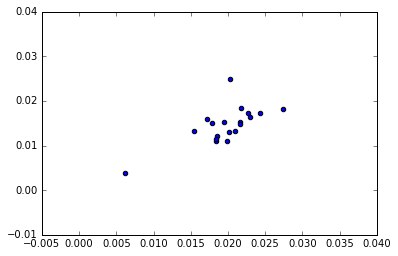

In [237]:
#total dependents per return vs total single returns per return
x = []
y = []
for i in range(19):
    divide = totals[i][0]
    x1 = avrgs[i][1]
    x1 = x1/float(divide)
    y1 = avrgs[i][3]
    y1 = y1/float(divide)
    x.append(x1)
    y.append(y1)

plt.scatter(x,y)

In [238]:
r = sm.OLS(x,sm.add_constant(y)).fit()
print (r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     16.27
Date:                Tue, 26 Apr 2016   Prob (F-statistic):           0.000863
Time:                        23:06:30   Log-Likelihood:                 83.538
No. Observations:                  19   AIC:                            -163.1
Df Residuals:                      17   BIC:                            -161.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0094      0.003      3.497      0.0

/Users/Aditi/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


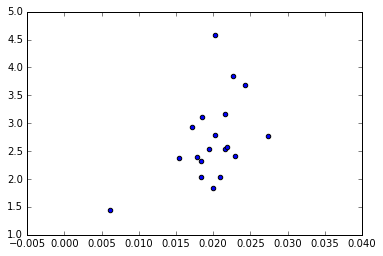

In [231]:
#total dependents per return vs total income returns per return
x = []
y = []
for i in range(19):
    divide = totals[i][0]
    x1 = avrgs[i][1]
    x1 = x1/float(divide)
    y1 = avrgs[i][4]
    y1 = y1/float(divide)
    x.append(x1)
    y.append(y1)

plt.scatter(x,y)